<a href="https://colab.research.google.com/github/ShawonSUSTSWE/ML-Lab/blob/main/Final%20Assignments/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
warnings.filterwarnings("ignore")

# Reading & Preparing Data

In [597]:
data = pd.read_csv("/content/bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [598]:
data.shape

(45211, 17)

In [599]:
y = data['y']
x = data.drop("y", axis=1)

# Splitting Data

In [600]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(36168, 16)
(9043, 16)


# Replacing categorical Datas with Numeric Values

In [601]:
cat_col = []

for column in x_train.dtypes.index:
  if x_train[column].dtypes == "object":
    cat_col.append(column)

print("Categorical Columns: ", cat_col)

num_col = []

for column in x_train.dtypes.index:
  if x_train[column].dtypes != "object":
    num_col.append(column)

print("Numerical Columns: ", num_col)

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [602]:
def transform(encoder, x, columns):
    transformed_array = encoder.transform(x)

    enc = encoder.named_transformers_['cat'].named_steps['onehot']
    cat_column_list = enc.get_feature_names_out(cat_col)

    cat_colnames = np.concatenate([cat_column_list]).tolist()
    all_colnames = num_col + cat_colnames

    transformed_array = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)

    return transformed_array

In [603]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)])

encoder = preprocessor.fit(x_train)

In [604]:
x_train = transform(encoder, x_train, cat_col)
x_test = transform(encoder, x_test, cat_col)

# SMOTE Oversampling

<Axes: xlabel='count'>

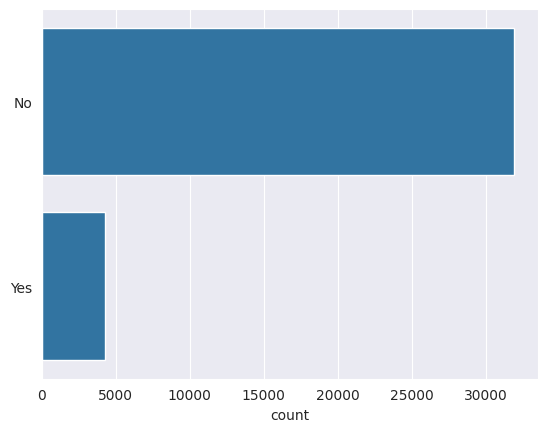

In [605]:
l = []
for i in y_train:
    if(i == "yes"):
        l.append("Yes")
    else:
        l.append("No")
sns.countplot(l)

Our Data is biased towards No. By Simply predicting everything as No, we can get good Accuracy Results. We should try applying SMOTE oversampling to reduce the effect of bias in our dataset.

In [606]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Counter before SMOTE Oversampling: ", counter)

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print("Counter after SMOTE Oversampling: ", counter)

Counter before SMOTE Oversampling:  Counter({'no': 31930, 'yes': 4238})
Counter after SMOTE Oversampling:  Counter({'no': 31930, 'yes': 31930})


In [607]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.843505,-0.718038,-1.422301,-0.211508,-0.570743,-0.409938,-0.242052,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.749231,-0.288000,0.021368,-0.207645,0.079552,1.428397,3.505972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.654956,-0.187023,0.141674,-0.790861,-0.570743,-0.409938,-0.242052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.843505,0.293019,-0.219243,0.595724,-0.245596,-0.409938,-0.242052,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.937779,-0.444143,-0.580161,-0.566844,0.404700,0.453979,0.590842,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Simple Logistic Regression Model

In [608]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [609]:
pred = logistic_regression.predict(x_test)

# Model Evaluation

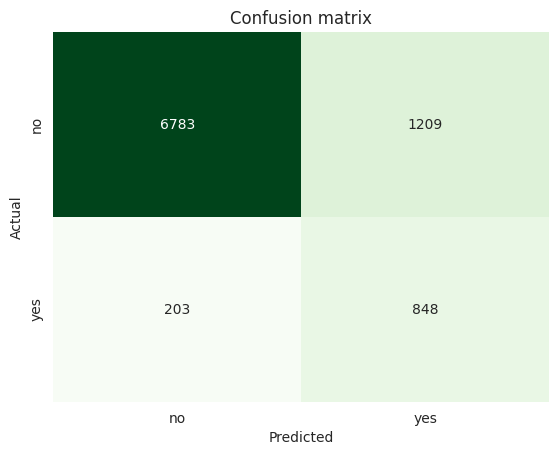

In [610]:
cm=confusion_matrix(y_test,pred)
labels=['no','yes']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Greens)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [611]:
#Calculating Precision, Recall, Accuracy & F1-Score

tn,fp,fn,tp=cm.ravel()
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1score=(2*precision*recall/(precision+recall))

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1score)

Accuracy: 84.38571270596042
Precision: 41.22508507535245
Recall: 80.68506184586109
F1 score: 54.56885456885457
